In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [99]:
# Load the CSV file
data = pd.read_csv('datasets/english.csv')


In [100]:
data=data[(data['label']=='1') | (data['label']=='0')]


In [101]:
encoder=LabelEncoder()
data['label']=encoder.fit_transform(data["label"])


In [48]:
# Preprocess the images and labels
x = []
y = []
for index, row in data.iterrows():
    img = cv2.imread('datasets/' + row['image'])  # Prepend the folder name to the image path
    if img is None:
        print(f"Failed to load image: {row['image']}")
        continue
    img = cv2.resize(img, (224, 224))    # Resize the image
    img = img / 255.0                    # Normalize pixel values
    x.append(img)
    y.append(row['label'])

x = np.array(x)
y = np.array(y)


In [49]:
# Split the dataset into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)


In [50]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Change the activation to softmax for multi-class classification
])



C:\Users\abdul saboor\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [53]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [54]:

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 118s 12s/step - accuracy: 0.5519 - loss: 3.2584 - val_accuracy: 0.5000 - val_loss: 3.9555
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 10s/step - accuracy: 0.5329 - loss: 2.6300 - val_accuracy: 0.5000 - val_loss: 0.8239
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 10s/step - accuracy: 0.4842 - loss: 0.7605 - val_accuracy: 0.5000 - val_loss: 0.6483
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 10s/step - accuracy: 0.5212 - loss: 0.6269 - val_accuracy: 0.5000 - val_loss: 0.6329
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 11s/step - accuracy: 0.6962 - loss: 0.5908 - val_accuracy: 0.5714 - val_loss: 0.5384
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 34s 10s/step - accuracy: 0.6835 - loss: 0.5065 - val_accuracy: 0.7857 - val_loss: 0.4906
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 47s 11s/step - accuracy: 0.8830 - loss: 0.4171 - val_accuracy: 0.7857 - val_loss: 0.3651
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 34s 10s/step - accuracy: 0.9025 - loss: 0.2687 - val_accuracy: 0.8571 - val_loss: 0.2807

In [65]:

# # Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# # Save the model
# model.save('image_classifier_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9412 - loss: 0.2664
Test accuracy: 0.9411764740943909


In [106]:
# Select a random sample from the test set
sample_index = np.random.randint(0, len(x_test))
sample_image = x_test[sample_index]
sample_label = y_test[sample_index]
print(sample_label)

0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


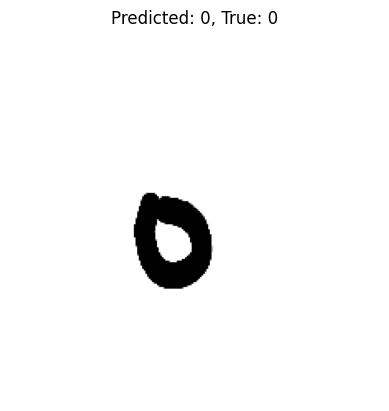

In [107]:
# Get the model's prediction for the selected sample
for x in sample
    prediction = model.predict(np.expand_dims(sample_image, axis=0))
    predicted_label = np.argmax(prediction)
    
    # Plot the sample image and its predicted label
    plt.imshow(sample_image, cmap='gray')  # Plot the grayscale image directly
    plt.title(f"Predicted: {predicted_label}, True: {np.argmax(sample_label)}")
    plt.axis('off')
    plt.show()